In [13]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [14]:
#Load dataset
df = pd.read_csv('../data/raw/New_Anime_list.csv', index_col=0)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset shape: (2500, 8)
Columns: ['title', 'genre', 'studio', 'number_of_episodes', 'release_date', 'content_type', 'viewer_reviews', 'source']


In [15]:
# Display basic info
df.head()

,title,genre,studio,number_of_episodes,release_date,content_type,viewer_reviews,source
0,Attack on Titan,"Action, Drama, Fantasy, Mystery",WIT STUDIO,25,2013-04-01,Tv,84.0,AniList
1,Demon Slayer: Kimetsu no Yaiba,"Action, Adventure, Drama, Fantasy, Supernatural",ufotable,26,2019-04-01,Tv,82.0,AniList
2,Death Note,"Mystery, Psychological, Supernatural, Thriller",MADHOUSE,37,2006-10-01,Tv,84.0,AniList
3,JUJUTSU KAISEN,"Action, Drama, Supernatural",Toho,24,2020-10-01,Tv,85.0,AniList
4,My Hero Academia,"Action, Adventure, Comedy",bones,13,2016-04-01,Tv,76.0,AniList


In [16]:
#Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               2500 non-null   object        
 1   genre               2500 non-null   object        
 2   studio              2500 non-null   object        
 3   number_of_episodes  2500 non-null   int64         
 4   release_date        2483 non-null   datetime64[ns]
 5   content_type        2500 non-null   object        
 6   viewer_reviews      2500 non-null   float64       
 7   source              2500 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 175.8+ KB


In [17]:
#Get statistical summary 
df.describe()

,number_of_episodes,release_date,viewer_reviews
count,2500.00000,2483,2500.000000
mean,15.23040,2015-08-18 06:47:07.225131008,70.953600
min,0.00000,1970-04-01 00:00:00,0.000000
25%,8.00000,2012-03-16 12:00:00,67.000000
50%,12.00000,2016-10-01 00:00:00,72.000000
75%,13.00000,2021-04-01 00:00:00,77.000000
max,1000.00000,2026-01-01 00:00:00,91.000000
std,31.41517,NaN,11.399133


In [18]:
#Check missing values
missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_summary[missing_summary['Missing_Count'] > 0]

,Missing_Count,Percentage
release_date,17,0.68


In [19]:
# Analyze viewer reviews
print("VIEWER REVIEWS ANALYSIS")
print("-" * 30)
print(f"Range: {df['viewer_reviews'].min():.1f} - {df['viewer_reviews'].max():.1f}")
print(f"Mean: {df['viewer_reviews'].mean():.2f}")
print(f"Negative reviews: {(df['viewer_reviews'] < 0).sum()}")
print(f"Reviews > 100: {(df['viewer_reviews'] > 100).sum()}")


VIEWER REVIEWS ANALYSIS
------------------------------
Range: 0.0 - 91.0
Mean: 70.95
Negative reviews: 0
Reviews > 100: 0


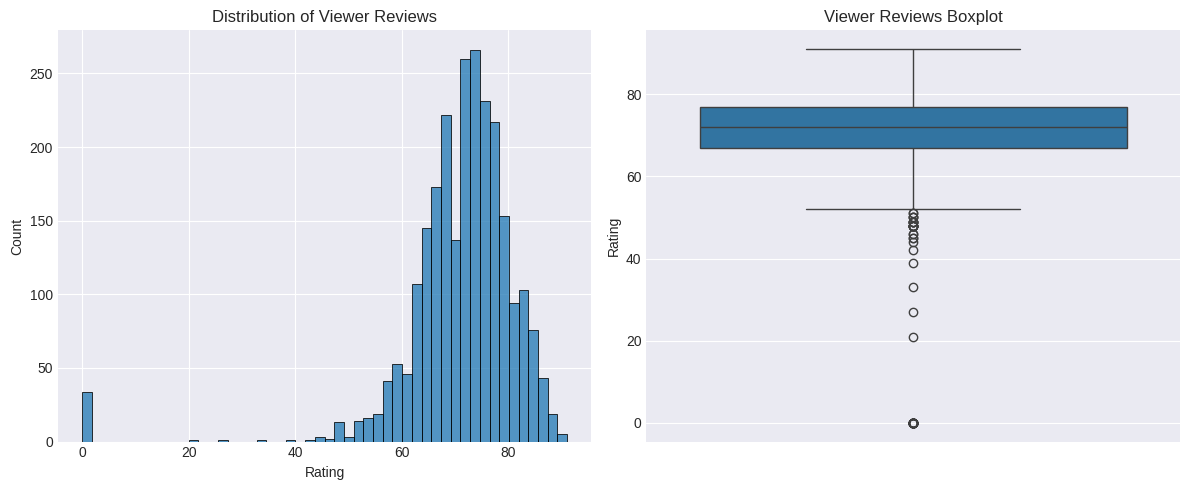

In [20]:
# Visualize viewer reviews distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.set_title('Distribution of Viewer Reviews')
sns.histplot(data=df, x='viewer_reviews', bins=50, ax=ax1)
ax1.set_xlabel('Rating')

# Boxplot
ax2.set_title('Viewer Reviews Boxplot')
sns.boxplot(data=df, y='viewer_reviews', ax=ax2)
ax2.set_ylabel('Rating')

plt.tight_layout()
plt.show()

In [21]:
# Analyze problematic data
print("DATA QUALITY ISSUES")
print("-" * 30)

# Zero episodes analysis
zero_episodes = df[df['number_of_episodes'] == 0]
print(f"Animes with 0 episodes: {len(zero_episodes)}")
print(f"Content types: {zero_episodes['content_type'].value_counts().to_dict()}")

# Zero reviews analysis
zero_reviews = df[df['viewer_reviews'] == 0]
print(f"\nAnimes with 0 reviews: {len(zero_reviews)}")

# Date issues
print(f"\nMissing dates (NaT): {df['release_date'].isna().sum()}")

# Correlation between issues
both_zero = df[(df['number_of_episodes'] == 0) & (df['viewer_reviews'] == 0)]
print(f"\nAnimes with BOTH 0 episodes AND 0 reviews: {len(both_zero)}")

DATA QUALITY ISSUES
------------------------------
Animes with 0 episodes: 33
Content types: {'Tv': 32, 'Unknown': 1}

Animes with 0 reviews: 34

Missing dates (NaT): 17

Animes with BOTH 0 episodes AND 0 reviews: 29


In [22]:
#Investigate TV shows with 0 episodes
tv_zero_episodes = df[(df['number_of_episodes'] == 0) & (df['content_type'] == 'Tv')]

if len(tv_zero_episodes) > 0:
    print(f"TV shows with 0 episodes: {len(tv_zero_episodes)}")
    print("\nYear distribution:")
    print(tv_zero_episodes['release_date'].dt.year.value_counts().sort_index())
    
    print("\nExamples:")
    print(tv_zero_episodes[['title', 'release_date', 'viewer_reviews', 'studio']].head())

TV shows with 0 episodes: 32

Year distribution:
release_date
1996.0     1
2025.0    18
2026.0     2
Name: count, dtype: int64

Examples:
                             title release_date  viewer_reviews  \
877                One Punch Man 3   2025-10-01             0.0   
880            DAN DA DAN Season 2   2025-07-01             0.0   
899                    Case Closed   1996-01-01            81.0   
1079  My Dress-Up Darling Season 2   2025-07-01             0.0   
1142          Kaiju No. 8 Season 2   2025-07-01             0.0   

                 studio  
877            Shueisha  
880        Science SARU  
899   TMS Entertainment  
1079            Aniplex  
1142           Shueisha  
